In [36]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Bobot kriteria
bobot = {
    'Kriteria Tambahan': 3,
    'Nilai Akademik': 6,
    'Passion': 6,
    'Pengalaman Proyek': 7,
    'Prestasi Kompetisi': 6,
    'Sertifikasi': 8
}

# Step 1: Pairwise Comparison Matrix
def generate_pairwise_matrix(weights):
    criteria = list(weights.keys())
    n = len(criteria)
    pairwise_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            if i == j:
                pairwise_matrix[i][j] = 1
            elif weights[criteria[i]] > weights[criteria[j]]:
                pairwise_matrix[i][j] = weights[criteria[i]] / weights[criteria[j]]
            else:
                pairwise_matrix[i][j] = weights[criteria[j]] / weights[criteria[i]]
    
    return pairwise_matrix

pairwise_matrix = generate_pairwise_matrix(bobot)

# Step 2: Generate TFN (Triangular Fuzzy Numbers)
def generate_tfn_from_weights(weights, threshold=0.15):
    tfn = {}
    for key, weight in weights.items():
        lower = weight * (1 - threshold)
        upper = weight * (1 + threshold)
        tfn[key] = [lower, weight, upper]
    return tfn

tfn = generate_tfn_from_weights(bobot)

# Step 3: Normalize TFNs
def normalize_tfn(tfn):
    total = sum([sum(v) for v in tfn.values()])
    normalized_tfn = {}
    for key, values in tfn.items():
        normalized_tfn[key] = [v / total for v in values]
    return normalized_tfn

normalized_tfn = normalize_tfn(tfn)

# Step 4: Calculate the Fuzzy Weight Vector
def calculate_fuzzy_weight_vector(normalized_tfn):
    fuzzy_weight_vector = {}
    for key, values in normalized_tfn.items():
        fuzzy_weight_vector[key] = np.mean(values)  # Rata-rata dari TFN
    return fuzzy_weight_vector

fuzzy_weight_vector = calculate_fuzzy_weight_vector(normalized_tfn)

# Step 5: Defuzzification using Center of Area (CoA)
def defuzzify(fuzzy_weight_vector):
    return {key: np.mean([value]) for key, value in fuzzy_weight_vector.items()}

crisp_weights = defuzzify(fuzzy_weight_vector)

# Step 6: Normalize Crisp Weights
def normalize_crisp_weights(crisp_weights):
    total = sum(crisp_weights.values())
    normalized_crisp_weights = {key: value / total for key, value in crisp_weights.items()}
    return normalized_crisp_weights

normalized_crisp_weights = normalize_crisp_weights(crisp_weights)

In [38]:
# Data kriteria untuk tiap pendaftar
pendaftar_data = {
    'Pendaftar 1': {'Kriteria Tambahan': 90, 'Nilai Akademik': 70, 'Passion': 75, 'Pengalaman Proyek': 80, 'Prestasi Kompetisi': 85, 'Sertifikasi': 80},
    'Pendaftar 2': {'Kriteria Tambahan': 95, 'Nilai Akademik': 70, 'Passion': 75, 'Pengalaman Proyek': 80, 'Prestasi Kompetisi': 85, 'Sertifikasi': 70},
    'Pendaftar 3': {'Kriteria Tambahan': 30, 'Nilai Akademik': 60, 'Passion': 45, 'Pengalaman Proyek': 30, 'Prestasi Kompetisi': 25, 'Sertifikasi': 30},
    'Pendaftar 4': {'Kriteria Tambahan': 90, 'Nilai Akademik': 60, 'Passion': 75, 'Pengalaman Proyek': 80, 'Prestasi Kompetisi': 75, 'Sertifikasi': 80}
}

scores = {}
for pendaftar, kriteria in pendaftar_data.items():
    score = sum(kriteria[kriteria_name] * normalized_crisp_weights[kriteria_name] for kriteria_name in kriteria)
    scores[pendaftar] = score
    print(f"Skor {pendaftar}: {score}")


Skor Pendaftar 1: 79.16666666666666
Skor Pendaftar 2: 77.3611111111111
Skor Pendaftar 3: 36.66666666666666
Skor Pendaftar 4: 75.83333333333331


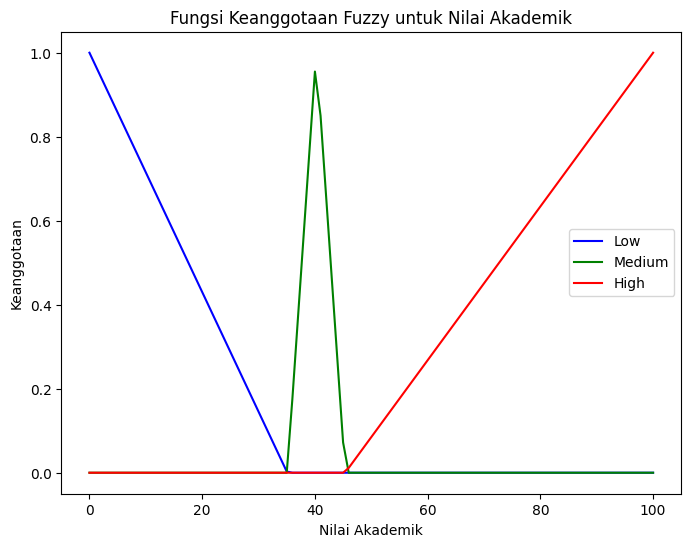

In [39]:
# Rentang untuk masing-masing kriteria
x_kriteria = np.arange(0, 101, 1)

# Fungsi keanggotaan fuzzy untuk tiap kriteria dengan rentang baru
lower = 35.10
middle = 40.23
upper = 45.37

nilai_akademik_low = fuzz.trimf(x_kriteria, [0, 0, lower])
nilai_akademik_medium = fuzz.trimf(x_kriteria, [lower, middle, upper])
nilai_akademik_high = fuzz.trimf(x_kriteria, [upper, 100, 100])

# Visualisasi fungsi keanggotaan
plt.figure(figsize=(8, 6))
plt.plot(x_kriteria, nilai_akademik_low, 'b', linewidth=1.5, label='Low')
plt.plot(x_kriteria, nilai_akademik_medium, 'g', linewidth=1.5, label='Medium')
plt.plot(x_kriteria, nilai_akademik_high, 'r', linewidth=1.5, label='High')
plt.title('Fungsi Keanggotaan Fuzzy untuk Nilai Akademik')
plt.xlabel('Nilai Akademik')
plt.ylabel('Keanggotaan')
plt.legend()
plt.show()

In [40]:
# Menghitung keanggotaan berdasarkan skor keseluruhan untuk semua pendaftar
for pendaftar, score in scores.items():
    keanggotaan_low = fuzz.interp_membership(x_kriteria, nilai_akademik_low, score)
    keanggotaan_medium = fuzz.interp_membership(x_kriteria, nilai_akademik_medium, score)
    keanggotaan_high = fuzz.interp_membership(x_kriteria, nilai_akademik_high, score)

    print(f"Keanggotaan {pendaftar} berdasarkan skor keseluruhan - Low: {keanggotaan_low}, Medium: {keanggotaan_medium}, High: {keanggotaan_high}")

Keanggotaan Pendaftar 1 berdasarkan skor keseluruhan - Low: 0.0, Medium: 0.0, High: 0.6186466532430287
Keanggotaan Pendaftar 2 berdasarkan skor keseluruhan - Low: 0.0, Medium: 0.0, High: 0.5855960298574245
Keanggotaan Pendaftar 3 berdasarkan skor keseluruhan - Low: 0.0, Medium: 0.30539311241065437, High: 0.0
Keanggotaan Pendaftar 4 berdasarkan skor keseluruhan - Low: 0.0, Medium: 0.0, High: 0.5576301177619132
